<a href="https://colab.research.google.com/github/passionforcodez/Python/blob/main/ImageCaptioningApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import io
import IPython.display
from PIL import Image
import base64
from google.colab import userdata # Import userdata

# Access the API key from Colab Secrets
hf_api_key = userdata.get('HuggingFace')

# You can print to verify, but be careful not to expose your key in outputs
# print(hf_api_key)

In [ ]:
!pip install transformers

In [2]:
# Helper functions
import requests, json
from transformers import pipeline
from PIL import Image

pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")


#Image-to-text endpoint
def get_completion(image_input):
    """
    Generate caption for an image locally.
    image_input: URL or local path of image
    """
    # Load image from URL or local path
    if isinstance(image_input, str) and image_input.startswith("http"):
        image = Image.open(requests.get(image_input, stream=True).raw)
    else:
        image = Image.open(image_input)

    # Generate caption
    result = pipe(image)
    return result[0]['generated_text']

# Example usage
image_url = "https://free-images.com/sm/bce8/yorkie_yorkshire_terrier_cute.jpg"
caption = get_completion(image_url)
print("📝 Caption:", caption)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor di

📝 Caption: there is a small dog sitting on a cushion on a chair


Device set to use cuda:0


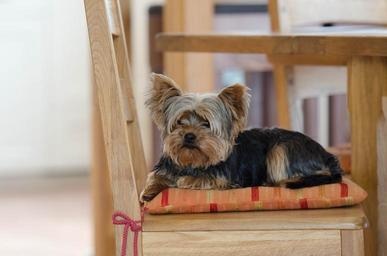

📝 Caption: there is a small dog sitting on a cushion on a chair


In [4]:
# Imports
import requests
from PIL import Image
from IPython.display import display
from transformers import pipeline

# Load pipeline
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")

# Function to generate caption and display image
def get_completion(image_input):
    """
    Generate caption for an image locally and display the image.
    image_input: URL or local path of image
    """
    # Load image from URL or local path
    if isinstance(image_input, str) and image_input.startswith("http"):
        image = Image.open(requests.get(image_input, stream=True).raw)
    else:
        image = Image.open(image_input)

    # Display the image
    display(image)

    # Generate caption
    result = pipe(image)
    return result[0]['generated_text']

# Example usage
image_url = "https://free-images.com/sm/bce8/yorkie_yorkshire_terrier_cute.jpg"
caption = get_completion(image_url)
print("📝 Caption:", caption)


In [12]:
!pip install --upgrade gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: gradio
    Found existing installation: gradio 5.49.0
    Uninstalling gradio-5.49.0:
      Successfully uninstalled gradio-5.49.0


In [5]:
import gradio as gr
from transformers import pipeline
from PIL import Image
import requests
from io import BytesIO

# Load BLIP pipeline
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")

# Function to generate caption
def captioner(image):
    return pipe(image)[0]['generated_text']

gr.close_all()

# Sample image URLs
sample_images = [
    "https://free-images.com/sm/bce8/yorkie_yorkshire_terrier_cute.jpg",  # Cute Yorkie
    "https://free-images.com/sm/ee7b/cow_animal_cow_head.jpg",  # Cow
    "https://free-images.com/sm/9e46/white_bengal_tiger_tiger_0.jpg"   # Tiger
]

# Load images from URLs for Gradio examples
examples = []
for url in sample_images:
    response = requests.get(url)
    examples.append(Image.open(BytesIO(response.content)))

with gr.Blocks() as demo:
    gr.Markdown("# Image Captioning with BLIP")

    with gr.Row():
        image_input = gr.Image(type="pil", label="Upload Image")
        caption_output = gr.Textbox(label="Caption", lines=3)

    submit_button = gr.Button("Generate Caption")
    submit_button.click(captioner, inputs=image_input, outputs=caption_output)

    # Add example images
    gr.Examples(examples=examples, inputs=image_input)

# Launch the Gradio app
demo.launch(share=True, debug=True)


Device set to use cuda:0


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://e01e0e43291c01d14d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://e01e0e43291c01d14d.gradio.live
